In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fm = pd.read_csv(r"C:\Users\amris\Downloads\callely dataset.csv",encoding= 'unicode_escape')

In [4]:
fm.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [5]:
fm.count()  # total count of each columns

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [7]:
fm.isnull().sum()# finding missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
fm.dropna(inplace= True)#dropping missing values
fm.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
fm['InvoiceDate']= pd.to_datetime(fm['InvoiceDate'])# converting datetime into timestamp

In [14]:
fm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [16]:
fm['InvoiceDate'].min(),fm['InvoiceDate'].max() # definding time range by Min and Max function

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [24]:
fm=fm.sort_values(by='Quantity')# sorting the highest quantity in dataset which is 80995 in UK

In [26]:
fm.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [29]:
Country =fm['Country'].unique()
print(Country)                  # unique countries in common

['United Kingdom' 'Japan' 'Netherlands' 'EIRE' 'Spain' 'Germany' 'France'
 'Sweden' 'Australia' 'Switzerland' 'Austria' 'USA' 'Cyprus' 'Israel'
 'Finland' 'Denmark' 'Czech Republic' 'Portugal' 'Italy' 'Norway'
 'Belgium' 'Poland' 'Saudi Arabia' 'Malta' 'Channel Islands'
 'European Community' 'Greece' 'Singapore' 'Canada' 'Unspecified'
 'United Arab Emirates' 'RSA' 'Brazil' 'Iceland' 'Bahrain' 'Lebanon'
 'Lithuania']


In [30]:
Country.shape[0]

37

In [34]:
Des= fm['Description'].unique()[:10] # most used item 
print(Des)

['PAPER CRAFT , LITTLE BIRDIE' 'MEDIUM CERAMIC TOP STORAGE JAR'
 'ROTATING SILVER ANGELS T-LIGHT HLDR'
 'FAIRY CAKE FLANNEL ASSORTED COLOUR' 'GIN + TONIC DIET METAL SIGN'
 'WHITE HANGING HEART T-LIGHT HOLDER' 'HERB MARKER BASIL' 'Manual'
 'TEA TIME PARTY BUNTING' 'PINK BLUE FELT CRAFT TRINKET BOX']


In [37]:
fm.Country.value_counts()[:10] # top 10 common countries


United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: Country, dtype: int64

In [42]:
fm.Description.value_counts()[:5]

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: Description, dtype: int64

In [47]:
fm.groupby('Country')['Quantity'].sum().sort_values(ascending=False)# maximum amount of Quantity in all unique countries.

Country
United Kingdom          4008533
Netherlands              200128
EIRE                     136329
Germany                  117448
France                   109848
Australia                 83653
Sweden                    35637
Switzerland               29778
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16044
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Israel                     3990
Poland                     3653
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Czech Republic              592


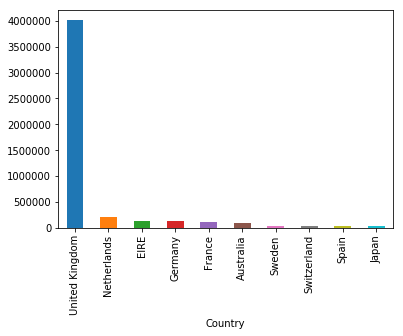

In [56]:
fm.groupby('Country')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar')# Visulization of the highest quantity in UK country.

In [60]:
fm["Total Price"] = fm["UnitPrice"] * fm["Quantity"]
fm.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom,960.00
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,6539.40
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom,191.16
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,3202.92
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.00
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.00
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.00
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60


In [65]:
fm['year'] = fm['InvoiceDate'].dt.year
fm['month'] = fm['InvoiceDate'].dt.month


In [67]:
fm.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,year,month
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.0,2011,5
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.0,2011,10
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.0,2011,11
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011,1
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,2011,12


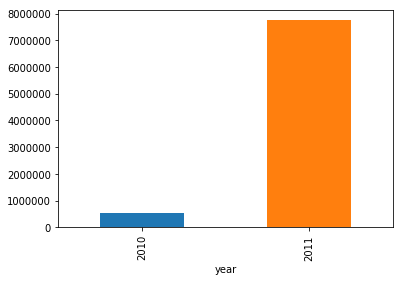

In [93]:
 # (1)total purchase sold per year. In 2011 it was the highest purchase
fm.groupby('year')['Total Price'].sum().plot(kind='bar') 

In [84]:
# (2)finding how many total sale has been done in each country by finding total quantity
new_fm = fm.drop(['CustomerID','year','month','UnitPrice'],axis=1)
coun_fm = new_fm.groupby(['Country']).sum()
coun_fm.sort_values('Total Price',ascending=False,inplace=True)


coun_fm.head()

,Quantity,Total Price
Country,,
United Kingdom,4008533,6767873.394
Netherlands,200128,284661.540
EIRE,136329,250285.220
Germany,117448,221698.210
France,109848,196712.840


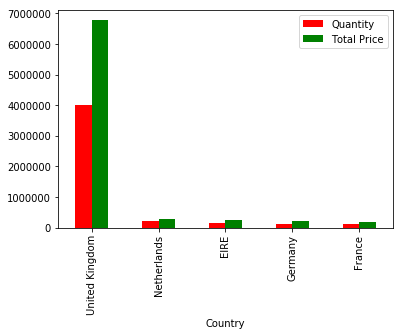

In [90]:
coun_fm.head(5).plot(kind='bar',color='rg')

In [107]:
# (3)on which month country got highest amount by quantity 
month_df=fm[['Quantity','Total Price','InvoiceDate','Country','year','month']]

In [109]:
date_df = month_df.groupby(['year','month']).sum()
total_value = date_df.sort_values('Total Price',ascending=False)
total_value


Quantity  Total Price
year month                       
2011 11       669915  1132407.740
     10       569666   974603.590
     9        537496   931440.372
     5        367852   648251.080
     8        386612   616368.000
     6        356922   608013.160
     3        344012   579964.610
     7        363418   574238.481
2010 12       296362   554604.020
2011 1        269379   475074.380
     2        262833   436546.150
     4        278585   426047.851
     12       203836   342506.380

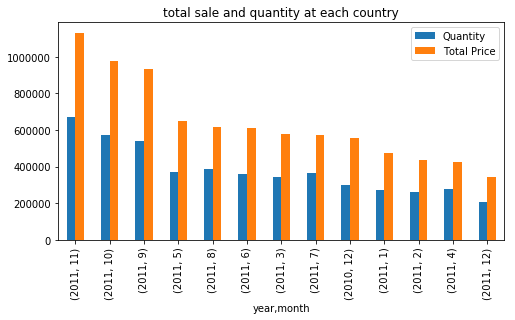

In [113]:
total_value.plot(kind='bar',figsize=(8,4),title='total sale and quantity at each country')


In [114]:
#(4)finding which month in each country got highest sale 
 = month_df.groupby('Country').max()
country_df.sort_values('Total Price',ascending=False,inplace=True)
country_df

,Quantity,Total Price,InvoiceDate,year,month
Country,,,,,
United Kingdom,80995,168469.60,2011-12-09 12:49:00,2011,12
Netherlands,2400,4992.00,2011-12-08 12:12:00,2011,12
France,912,4161.06,2011-12-09 12:50:00,2011,12
Singapore,288,3949.32,2011-10-19 11:18:00,2011,10
Japan,2040,3794.40,2011-12-06 11:40:00,2011,12
EIRE,1440,2365.20,2011-12-08 15:54:00,2011,12
Australia,1152,1718.40,2011-11-24 12:30:00,2011,12
Spain,360,1350.00,2011-12-07 17:05:00,2011,12
Portugal,120,1241.98,2011-12-07 15:56:00,2011,12


In [122]:
# (5)get all min,max,mean,SD,count of each numerical columns.
#it shows there is negative transaction too
fm.describe()

,Quantity,UnitPrice,CustomerID,Total Price,year,month
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854,2010.934002,7.605947
std,248.693370,69.315162,1713.600303,427.591718,0.248279,3.418942
min,-80995.000000,0.000000,12346.000000,-168469.600000,2010.000000,1.000000
25%,2.000000,1.250000,13953.000000,4.200000,2011.000000,5.000000
50%,5.000000,1.950000,15152.000000,11.100000,2011.000000,8.000000
75%,12.000000,3.750000,16791.000000,19.500000,2011.000000,11.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,2011.000000,12.000000


In [126]:
# total profit count 
sum(fm['Total Price'])

8300065.813999304

In [128]:
# comparing countries by totalprice
country = month_df.groupby('Country')

country['Total Price'].agg(np.sum).sort_values(ascending=False)

Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates

In [130]:
#United Kingdom has the maximum sale. finding most sold items by quantitiy in UK
uk_stock = fm[fm['Country']=='United Kingdom'].groupby('Description')
uk_stock_quantitiy = uk_stock['Quantity'].agg(np.sum).sort_values(ascending=False)
uk_stock_quantitiy.head(10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     47982
JUMBO BAG RED RETROSPOT               40880
ASSORTED COLOUR BIRD ORNAMENT         32679
WHITE HANGING HEART T-LIGHT HOLDER    32097
POPCORN HOLDER                        28562
PACK OF 12 LONDON TISSUES             24313
BROCADE RING PURSE                    22708
PACK OF 72 RETROSPOT CAKE CASES       22205
VICTORIAN GLASS HANGING T-LIGHT       21456
PACK OF 60 PINK PAISLEY CAKE CASES    19916
Name: Quantity, dtype: int64

In [ ]:
SELECT Total Price, COUNT(*) as cnt
  FROM 
 GROUP BY title
 ORDER BY cnt DESC
 LIMIT 20